<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


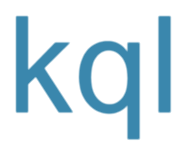

<IPython.core.display.Javascript object>

In [2]:
import Kqlmagic
%reload_ext Kqlmagic

import os
from msticpy.nbtools.wsconfig import WorkspaceConfig
ws_config_file = 'config.json'

WORKSPACE_ID = '440d1e9f-9be5-48d8-8b00-c08fd7b062f6'
TENANT_ID = 'ba47b1c4-37b1-4301-b0d6-eca8ccf0818f'
CLIENT_ID = '8ebb40a7-2d51-4441-9700-11e0a4348781'
CLIENT_SECRET = 'SWo2eY]hILYBK3o=p1HY//GeaAv23rHA'
WORKSPACE_ALIAS = 'cf-secureStart-la'
%kql loganalytics://tenant=TENANT_ID;clientid=CLIENT_ID;clientsecret=CLIENT_SECRET;workspace=WORKSPACE_ID;alias=WORKSPACE_ALIAS

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Get Protection Status and heartbeat data

In [5]:
# 1. Join protection status data with HeartBeat and project useful columns 
ps = '''ProtectionStatus
| project Computer , ThreatStatus , ProtectionStatus , TypeofProtection , ComputerIP_Hidden , ComputerEnvironment 
| join 
  (
   Heartbeat  
   | distinct Computer, OSName, OSType, OSMajorVersion, OSMinorVersion, Category
  ) on Computer
| sort by OSMinorVersion desc'''

In [6]:
%kql -query ps
protection_status_df = _kql_raw_result_.to_dataframe()

<IPython.core.display.Javascript object>

In [7]:
# 2
# shape of data 
print('Shape of data: ',protection_status_df.shape)

# first 5 records of data
protection_status_df.head(5)

Shape of data:  (168, 12)


,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion,Category
0,DC2,No threats detected,No real time protection,Malicious Software Removal Tool,52.165.28.90,Azure,DC2,,Windows,6,3,Direct Agent
1,teamcallvmsamik,Unknown,Not Reporting,Malicious Software Removal Tool,40.122.33.215,Azure,teamcallvmsamik,,Windows,6,3,Direct Agent
2,TeamCallVm,Unknown,Not Reporting,Malicious Software Removal Tool,52.173.39.105,Azure,TeamCallVm,,Windows,6,3,Direct Agent
3,ad-secondary-dc,No threats detected,No real time protection,Malicious Software Removal Tool,40.113.216.15,Azure,ad-secondary-dc,,Windows,6,3,Direct Agent
4,detke--vm,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.38.87,Azure,detke--vm,Red Hat Enterprise Linux,Linux,7,3,Direct Agent


In [8]:
# 3. 
# Distribution of OSType
print('Distribution of OSType:','\n', protection_status_df.OSType.value_counts())

# what are threat status for each computer IPs
protection_status_df.groupby('ComputerIP_Hidden').ThreatStatus.value_counts()

Distribution of OSType: 
 Windows    138
Linux       30
Name: OSType, dtype: int64


ComputerIP_Hidden  ThreatStatus       
103.227.97.64      No threats detected    1
103.68.176.242     No threats detected    1
103.70.153.152     No threats detected    1
104.208.156.60     No threats detected    1
104.209.130.198    No threats detected    1
104.209.160.16     No threats detected    1
104.209.216.30     No threats detected    1
104.42.146.216     No threats detected    1
104.43.139.221     No threats detected    1
104.43.140.18      No threats detected    1
104.43.212.150     No threats detected    1
104.43.222.124     Unknown                1
104.43.240.81      No threats detected    1
104.45.24.199      No threats detected    1
106.51.233.73      No threats detected    1
123.201.54.187     No threats detected    1
13.67.128.204      Unknown                1
13.67.178.42       No threats detected    1
13.67.184.72       Unknown                1
13.67.220.255      No threats detected    1
13.67.222.244      No threats detected    1
13.68.233.19       No threats detecte

In [9]:
# 4. Records where threatstatus is 'No threats detected'
protection_status_df[protection_status_df['ThreatStatus'] == 'No threats detected']

,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion,Category
0,DC2,No threats detected,No real time protection,Malicious Software Removal Tool,52.165.28.90,Azure,DC2,,Windows,6,3,Direct Agent
3,ad-secondary-dc,No threats detected,No real time protection,Malicious Software Removal Tool,40.113.216.15,Azure,ad-secondary-dc,,Windows,6,3,Direct Agent
6,cluster-fsw,No threats detected,No real time protection,Malicious Software Removal Tool,40.122.33.202,Azure,cluster-fsw,,Windows,6,3,Direct Agent
7,test-2k12.cerraform.com,No threats detected,No real time protection,Malicious Software Removal Tool,40.122.114.187,Azure,test-2k12.cerraform.com,,Windows,6,2,Direct Agent
14,w2008-mma,No threats detected,No real time protection,Malicious Software Removal Tool,104.42.146.216,Azure,w2008-mma,,Windows,6,1,Direct Agent
38,CF-SS-WIN10-A.cerraform.com,No threats detected,Real time protection,Windows Defender,23.99.129.193,Azure,CF-SS-WIN10-A.cerraform.com,,Windows,10,0,Direct Agent
39,win10-c6.bitcdemo.com,No threats detected,Real time protection,Windows Defender,52.237.250.81,Azure,win10-c6.bitcdemo.com,,Windows,10,0,Direct Agent
40,Mahesh-Laptop,No threats detected,No real time protection,Windows Defender,175.101.108.8,Non-Azure,Mahesh-Laptop,,Windows,10,0,Direct Agent
41,detek-vm,No threats detected,Signatures out of date,Windows Defender,23.99.198.7,Azure,detek-vm,,Windows,10,0,Direct Agent
42,adadmin.sccm.local,No threats detected,Real time protection,Windows Defender,104.43.140.18,Azure,adadmin.sccm.local,,Windows,10,0,Direct Agent


In [10]:
# 5. Distribution of Threat status 
protection_status_df.ThreatStatus.value_counts().iplot(kind='bar')

In [27]:
# 6. Preprocessing
# replace empty string with null values using np.nan
protection_status_df.replace('', np.nan, inplace=True)

# drop null value rows and store in new dataframe ps
ps = protection_status_df.dropna()

In [28]:
# 7
# records where ThreatStatus is Unknown
protection_status_df[protection_status_df['ThreatStatus'] == 'Unknown']

# Inference - For unknown threat status, OSName are Ubuntu and red Hat

,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion
0,TeamCallVm,Unknown,Not Reporting,Malicious Software Removal Tool,52.173.39.105,Azure,TeamCallVm,NaN,Windows,6,3
1,detke--vm,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.38.87,Azure,detke--vm,Red Hat Enterprise Linux,Linux,7,3
2,detke-v,Unknown,Unknown,No Anti-Malware Tool was detected,13.89.231.200,Azure,detke-v,Red Hat Enterprise Linux,Linux,7,3
5,teamcallvmsamik,Unknown,Not Reporting,Malicious Software Removal Tool,40.122.33.215,Azure,teamcallvmsamik,NaN,Windows,6,3
7,chefclient,Unknown,Unknown,No Anti-Malware Tool was detected,23.99.193.238,Azure,chefclient,Red Hat Enterprise Linux,Linux,7,2
8,chef-node,Unknown,Unknown,No Anti-Malware Tool was detected,104.43.222.124,Azure,chef-node,Red Hat Enterprise Linux,Linux,7,2
9,linux-test-box,Unknown,Unknown,No Anti-Malware Tool was detected,40.69.172.154,Azure,linux-test-box,Red Hat Enterprise Linux,Linux,7,2
10,chef-server,Unknown,Unknown,No Anti-Malware Tool was detected,23.101.115.89,Azure,chef-server,Red Hat Enterprise Linux,Linux,7,2
11,chefdk,Unknown,Unknown,No Anti-Malware Tool was detected,13.67.128.204,Azure,chefdk,Red Hat Enterprise Linux,Linux,7,2
12,alertcheck,Unknown,Unknown,No Anti-Malware Tool was detected,40.76.19.122,Azure,alertcheck,NaN,Windows,6,1


In [14]:
# 8 - Distribution of Computer Environment
protection_status_df.ComputerEnvironment.value_counts()

Azure        130
Non-Azure     16
Name: ComputerEnvironment, dtype: int64

In [15]:
# 9 - Distribution of TypeofProtection
protection_status_df.TypeofProtection.value_counts().iplot(kind='bar')

In [14]:
# 10 - Records where TypeofProtection is 'No Anti-Malware Tool was detected'
protection_status_df[protection_status_df['TypeofProtection']=='No Anti-Malware Tool was detected']

# Inference - For 'No Anti-Malware Tool was detected' TypeofProtection, OSTypes are all Linux

,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion
1,detke--vm,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.38.87,Azure,detke--vm,Red Hat Enterprise Linux,Linux,7,3
2,detke-v,Unknown,Unknown,No Anti-Malware Tool was detected,13.89.231.200,Azure,detke-v,Red Hat Enterprise Linux,Linux,7,3
7,chefclient,Unknown,Unknown,No Anti-Malware Tool was detected,23.99.193.238,Azure,chefclient,Red Hat Enterprise Linux,Linux,7,2
8,chef-node,Unknown,Unknown,No Anti-Malware Tool was detected,104.43.222.124,Azure,chef-node,Red Hat Enterprise Linux,Linux,7,2
9,linux-test-box,Unknown,Unknown,No Anti-Malware Tool was detected,40.69.172.154,Azure,linux-test-box,Red Hat Enterprise Linux,Linux,7,2
10,chef-server,Unknown,Unknown,No Anti-Malware Tool was detected,23.101.115.89,Azure,chef-server,Red Hat Enterprise Linux,Linux,7,2
11,chefdk,Unknown,Unknown,No Anti-Malware Tool was detected,13.67.128.204,Azure,chefdk,Red Hat Enterprise Linux,Linux,7,2
14,sample,Unknown,Unknown,No Anti-Malware Tool was detected,52.232.253.233,Azure,sample,Ubuntu,Linux,16,04
15,vm31820956c3,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.33.121,Azure,vm31820956c3,Ubuntu,Linux,16,04
16,vma9b4299920,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.33.16,Azure,vma9b4299920,Ubuntu,Linux,16,04


In [29]:
# 11 - Records where TypeofProtection is 'Unknown'

protection_status_df[protection_status_df.ThreatStatus == 'Unknown']

# Inference - For 'Unknown' TypeofProtection, OSName are Ubuntu and red Hat

,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion
0,TeamCallVm,Unknown,Not Reporting,Malicious Software Removal Tool,52.173.39.105,Azure,TeamCallVm,NaN,Windows,6,3
1,detke--vm,Unknown,Unknown,No Anti-Malware Tool was detected,40.122.38.87,Azure,detke--vm,Red Hat Enterprise Linux,Linux,7,3
2,detke-v,Unknown,Unknown,No Anti-Malware Tool was detected,13.89.231.200,Azure,detke-v,Red Hat Enterprise Linux,Linux,7,3
5,teamcallvmsamik,Unknown,Not Reporting,Malicious Software Removal Tool,40.122.33.215,Azure,teamcallvmsamik,NaN,Windows,6,3
7,chefclient,Unknown,Unknown,No Anti-Malware Tool was detected,23.99.193.238,Azure,chefclient,Red Hat Enterprise Linux,Linux,7,2
8,chef-node,Unknown,Unknown,No Anti-Malware Tool was detected,104.43.222.124,Azure,chef-node,Red Hat Enterprise Linux,Linux,7,2
9,linux-test-box,Unknown,Unknown,No Anti-Malware Tool was detected,40.69.172.154,Azure,linux-test-box,Red Hat Enterprise Linux,Linux,7,2
10,chef-server,Unknown,Unknown,No Anti-Malware Tool was detected,23.101.115.89,Azure,chef-server,Red Hat Enterprise Linux,Linux,7,2
11,chefdk,Unknown,Unknown,No Anti-Malware Tool was detected,13.67.128.204,Azure,chefdk,Red Hat Enterprise Linux,Linux,7,2
12,alertcheck,Unknown,Unknown,No Anti-Malware Tool was detected,40.76.19.122,Azure,alertcheck,NaN,Windows,6,1


In [31]:
# 12 - Distribution of Protectionstatus and type of Protection - hover over plot to see values
protection_status_df.groupby('ProtectionStatus').TypeofProtection.value_counts().iplot(kind='bar', title = 'ProtectionStatus vs Type of Protection')

In [19]:
# 13 - Distribution of OSType and Protection status
pd.crosstab(protection_status_df['OSType'], protection_status_df['ProtectionStatus']).iplot(kind='bar')


In [32]:
# 14 - Distribution of ProtectionStatus
protection_status_df.ProtectionStatus.value_counts().iplot(kind = 'bar')

In [21]:
# 15 -  Distribution of TypeOfProtection
protection_status_df.groupby('TypeofProtection').ComputerEnvironment.value_counts().iplot(kind='bar')

In [33]:
# 16
# Records where ProtectionStatus is 'No real time protection'
protection_status_df[protection_status_df.ProtectionStatus == 'No real time protection']

# For 'No real time protection' no threats have been detected and OSType is Windows.

,Computer,ThreatStatus,ProtectionStatus,TypeofProtection,ComputerIP_Hidden,ComputerEnvironment,Computer1,OSName,OSType,OSMajorVersion,OSMinorVersion
3,ad-secondary-dc,No threats detected,No real time protection,Malicious Software Removal Tool,40.113.216.15,Azure,ad-secondary-dc,NaN,Windows,6,3
4,cluster-fsw,No threats detected,No real time protection,Malicious Software Removal Tool,40.122.33.202,Azure,cluster-fsw,NaN,Windows,6,3
6,test-2k12.cerraform.com,No threats detected,No real time protection,Malicious Software Removal Tool,40.122.114.187,Azure,test-2k12.cerraform.com,NaN,Windows,6,2
13,w2008-mma,No threats detected,No real time protection,Malicious Software Removal Tool,104.42.146.216,Azure,w2008-mma,NaN,Windows,6,1
81,CF-SS-SCCM01.cerraform.com,No threats detected,No real time protection,Windows Defender,40.122.208.196,Non-Azure,CF-SS-SCCM01.cerraform.com,NaN,Windows,10,0
131,Mahesh-Laptop,No threats detected,No real time protection,Windows Defender,175.101.108.8,Non-Azure,Mahesh-Laptop,NaN,Windows,10,0


In [25]:
# 17 - Distribution of TypeofProtection in ComputerEnvironment
pd.crosstab(protection_status_df['TypeofProtection'], protection_status_df['ComputerEnvironment']).iplot(kind='bar')

####  18 - Analyse computers that are not reporting

In [35]:
comp_no_report = '''ProtectionStatus
| where ProtectionStatus == "Not Reporting"
| summarize count(), startNotReporting = min(TimeGenerated), endNotReporting = max(TimeGenerated) by Computer, ProtectionStatusDetails
| join ProtectionStatus on Computer
| summarize lastReporting = max(TimeGenerated), startNotReporting = any(startNotReporting), endNotReporting = any(endNotReporting) by Computer
| extend durationNotReporting = endNotReporting - startNotReporting'''

In [37]:
%kql -query comp_no_report
not_reporting = _kql_raw_result_.to_dataframe()

In [38]:
# 19
not_reporting

,Computer,lastReporting,startNotReporting,endNotReporting,durationNotReporting
0,Srv-Work,2019-09-20 14:31:55.410,2019-07-09 13:18:33.530,2019-07-09 13:18:33.530,0 days 00:00:00
1,sccmserver.sccm.local,2019-09-20 14:31:56.573,2019-07-12 00:21:55.013,2019-07-15 16:07:24.277,63 days 05:05:00
2,TeamCallVm,2019-05-20 05:44:36.360,2019-04-08 21:08:29.840,2019-05-20 05:44:36.360,107 days 13:02:40
3,teamcallvmsamik,2019-04-05 16:51:41.647,2019-04-03 10:59:12.350,2019-04-05 16:51:41.647,65 days 14:52:00


In [40]:
# 20
not_reporting.iplot(kind='bar')

In [74]:
# 21
ProtectionStatus = '''ProtectionStatus
| where TimeGenerated >= ago(90d) 
|project Computer , ComputerEnvironment , ComputerIP_Hidden, TimeGenerated, DeviceName , ProtectionStatusDetails, Threat, ThreatStatus '''

%kql -query ProtectionStatus
ProtectionStatus_df = _kql_raw_result_.to_dataframe()

In [76]:
ProtectionStatus_df

,Computer,ComputerEnvironment,ComputerIP_Hidden,TimeGenerated,DeviceName,ProtectionStatusDetails,Threat,ThreatStatus
0,Cf-SS-DC01.cerraform.com,Azure,23.99.219.116,2019-08-04 11:58:57.300,Cf-SS-DC01.cerraform.com,AntivirusSignatureLastUpdated: 08/04/2019 05:2...,,No threats detected
1,hub-vm1,Azure,40.113.224.231,2019-08-04 14:11:45.127,hub-vm1,AntivirusSignatureLastUpdated: 08/04/2019 01:5...,,No threats detected
2,ad-secondary-dc,Azure,40.113.216.15,2019-08-04 14:22:41.353,ad-secondary-dc,No infection found,,No threats detected
3,Win10-scripts.borninthecloud.net,Azure,40.76.50.107,2019-08-04 14:23:09.763,Win10-scripts.borninthecloud.net,Signatures older than 7 days: Antispyware; Ant...,,No threats detected
4,BITCDemo-AppS1.bitcdemo.com,Azure,52.165.169.218,2019-08-04 14:25:28.570,BITCDemo-AppS1.bitcdemo.com,AntivirusSignatureLastUpdated: 08/04/2019 00:1...,,No threats detected
5,Cf-SS-DC01.cerraform.com,Azure,23.99.219.116,2019-08-04 14:18:40.397,Cf-SS-DC01.cerraform.com,AntivirusSignatureLastUpdated: 08/04/2019 05:2...,,No threats detected
6,ad-bdc2,Azure,104.209.130.198,2019-08-04 14:19:46.023,ad-bdc2,AntivirusSignatureLastUpdated: 08/03/2019 15:3...,,No threats detected
7,jeff1,Azure,52.179.177.77,2019-08-04 14:20:37.137,jeff1,AntivirusSignatureLastUpdated: 08/04/2019 00:1...,,No threats detected
8,demo-app,Azure,52.167.161.14,2019-08-04 14:21:50.990,demo-app,AntivirusSignatureLastUpdated: 08/04/2019 02:4...,,No threats detected
9,jeff1,Azure,52.179.177.77,2019-08-04 15:27:46.637,jeff1,AntivirusSignatureLastUpdated: 08/04/2019 00:1...,,No threats detected


In [80]:
# 22
# Preprocessing
# replace empty string with null values ans drop the null values and save in new dataframe, threat_values
ProtectionStatus_df.replace('', np.nan, inplace=True)
threat_values = ProtectionStatus_df.dropna()

# Distribution of Threat Counts
threat_values.Threat.value_counts()

# inference  - 'CustomEnterpriseBlock' has highest threat Count

EUS:Win32/CustomEnterpriseBlock     110
Backdoor:PHP/Remoteshell.B           95
HackTool:Win32/Mimikatz.D            66
Trojan:Win32/Pynamer.B!ac            55
HackTool:Win32/Mimikatz.E            51
HackTool:Win64/Mikatz!dha            49
Trojan:PowerShell/PSAttackTool.A     40
BrowserModifier:Win32/Prifou          4
HackTool:Win32/Mikatz!dha             4
Name: Threat, dtype: int64

In [33]:
# 23 -  Distribution of threat status
ProtectionStatus_df.ThreatStatus.value_counts().iplot(kind='bar')

In [35]:
# 24 - Computer where ThreatStatus is either Remediated or Quarantined
threat_Q_R = ProtectionStatus_df[(ProtectionStatus_df['ThreatStatus'] == 'Remediated') | (ProtectionStatus_df['ThreatStatus'] == 'Quarantined') ]

In [36]:
# 25 - threat_Q_R.groupby('Computer').ThreatStatus.value_counts().iplot(kind='bar')
pd.crosstab(threat_Q_R['ThreatStatus'], threat_Q_R['Computer']).iplot(kind='bar')

In [60]:
# 26 - Threat status and Computer information with their respective count
ProtectionStatus_df.groupby('ThreatStatus').Computer.value_counts()

ThreatStatus         Computer                        
Active               WinDefAdmin.bitcdemo.com               87
                     Mahesh-Laptop                           4
No threats detected  Cf-SS-DC01.cerraform.com            12084
                     CF-SS-SCCM01.cerraform.com           4253
                     CF-SS-DB01.cerraform.com             3010
                     BITCDemo-AppS1.bitcdemo.com          2163
                     teamscallqVM                         2163
                     BITC-O365i                           2162
                     O365Demo                             2162
                     win10-c1.bitcdemo.com                2162
                     Dev-Temp-DC01.BITC.contoso.com       2161
                     Dev-Temp-HADB01.BITC.contoso.com     2161
                     FNMA-Middleware                      2161
                     bitc-dc01.bitcdemo.com               2161
                     win10-c5.bitcdemo.com                2161
 

In [82]:
# 27 - Threat and Computer information with their respective count
ProtectionStatus_df.groupby('Threat').Computer.value_counts()

Threat                            Computer                
Backdoor:PHP/Remoteshell.B        LAPTOP-SC55MIA7              95
BrowserModifier:Win32/Prifou      Mahesh-Laptop                 4
EUS:Win32/CustomEnterpriseBlock   WinDefAdmin.bitcdemo.com    104
                                  Mahesh-Laptop                 6
HackTool:Win32/Mikatz!dha         windefadmin1                  4
HackTool:Win32/Mimikatz.D         WinDefAdmin.bitcdemo.com     66
HackTool:Win32/Mimikatz.E         WinDefAdmin.bitcdemo.com     47
                                  windefadmin1                  4
HackTool:Win64/Mikatz!dha         WinDefAdmin.bitcdemo.com     43
                                  windefadmin1                  6
Trojan:PowerShell/PSAttackTool.A  SolarSailer.bitcdemo.com     40
Trojan:Win32/Pynamer.B!ac         WinDefAdmin.bitcdemo.com     51
                                  windefadmin1                  4
Name: Computer, dtype: int64

In [39]:
# 28 - Records where ThreatStatus is Quarantined
ProtectionStatus_df[ProtectionStatus_df['ThreatStatus']=='Quarantined']

,Computer,ComputerEnvironment,ComputerIP_Hidden,TimeGenerated,DeviceName,ProtectionStatusDetails,Threat,ThreatStatus
1904,LAPTOP-37ABQUS2,Non-Azure,146.196.36.248,2019-03-19 04:41:56.470,LAPTOP-37ABQUS2,At least one threat detected,Trojan:Win32/Lodbak.gen!lnk,Quarantined
1922,win10-c4.bitcdemo.com,Azure,13.89.233.221,2019-03-19 05:12:08.080,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win32/Mimikatz.E,Quarantined
1954,win10-c4.bitcdemo.com,Azure,13.89.233.221,2019-03-19 06:04:57.993,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win32/Mimikatz.E,Quarantined
4615,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 11:04:58.703,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win64/Mikatz!rfn,Quarantined
4616,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 11:04:58.717,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win64/Mikatz!dha,Quarantined
4617,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 11:04:58.730,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win64/Mikatz!rfn,Quarantined
4618,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 11:04:58.747,win10-c4.bitcdemo.com,At least one threat detected,HackTool:Win32/Mimikatz.E,Quarantined
4623,win10-c3.bitcdemo.com,Azure,40.83.16.190,2019-03-19 11:13:47.333,win10-c3.bitcdemo.com,At least one threat detected,HackTool:Win64/Mikatz!dha,Quarantined
4624,win10-c3.bitcdemo.com,Azure,40.83.16.190,2019-03-19 11:13:47.573,win10-c3.bitcdemo.com,At least one threat detected,HackTool:Win32/Mimikatz.E,Quarantined
4625,win10-c3.bitcdemo.com,Azure,40.83.16.190,2019-03-19 11:13:47.753,win10-c3.bitcdemo.com,At least one threat detected,HackTool:Win32/Mimikatz.E,Quarantined


In [40]:
# 29 - # Records where ThreatStatus is Active
ProtectionStatus_df[ProtectionStatus_df['ThreatStatus']=='Active']

,Computer,ComputerEnvironment,ComputerIP_Hidden,TimeGenerated,DeviceName,ProtectionStatusDetails,Threat,ThreatStatus
4972,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:05:55.533,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
4973,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:05:55.543,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
4974,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:05:55.560,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
5011,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:58:46.203,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
5012,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:58:46.217,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
5013,win10-c4.bitcdemo.com,Azure,13.89.37.205,2019-03-19 20:58:46.227,win10-c4.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
18493,Mahesh-Laptop,Non-Azure,175.101.104.137,2019-04-08 14:32:30.310,Mahesh-Laptop,At least one threat detected,TrojanDownloader:Java/Toniper,Active
83684,WinDefAdmin.bitcdemo.com,Azure,40.86.100.192,2019-05-28 10:21:15.950,WinDefAdmin.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
84338,WinDefAdmin.bitcdemo.com,Azure,40.86.100.192,2019-05-27 09:14:06.710,WinDefAdmin.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active
84339,WinDefAdmin.bitcdemo.com,Azure,40.86.100.192,2019-05-27 09:14:06.710,WinDefAdmin.bitcdemo.com,At least one threat detected,EUS:Win32/CustomEnterpriseBlock,Active


In [41]:
# 30 - Distribution of ProtectionStatusDetails with DeviceName
ProtectionStatus_df.groupby('DeviceName').ProtectionStatusDetails.value_counts()

DeviceName             ProtectionStatusDetails                              
27352k8s9010           Signatures older than 7 days: Antispyware; Antivirus;    488
                       AntivirusSignatureLastUpdated: 04/28/2019 15:18:21       189
                       AntivirusSignatureLastUpdated: 03/18/2019 18:46:09        26
                       AntivirusSignatureLastUpdated: 04/10/2019 09:10:37        25
                       AntivirusSignatureLastUpdated: 04/11/2019 12:51:09        24
                       AntivirusSignatureLastUpdated: 04/12/2019 13:36:52        24
                       AntivirusSignatureLastUpdated: 04/09/2019 10:13:40        23
                       AntivirusSignatureLastUpdated: 04/13/2019 15:17:28        22
                       AntivirusSignatureLastUpdated: 03/16/2019 17:34:34        21
                       AntivirusSignatureLastUpdated: 04/14/2019 13:59:07        21
                       AntivirusSignatureLastUpdated: 04/24/2019 13:29:24        21